# Logistic Regression
- Trong file này em sẽ chọn lọc các feature cần thiết và nhãn để build model logistic regression và dự đoán xem giá cổ phiếu Open vào ngày mai sẽ tăng hay giảm so với hôm nay.

## 1. Import những thư viện cần thiết
- Logistic Regression model từ sklearn
- numpy, pandas để xử lí dữ liệu
- confusion_maxtrix,ConfusionMatrixDisplay,classification_report để đánh giá mô hình

In [70]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## 2. Xử lí dữ liệu và xây dựng mô hình, dự đoán

- Chúng ta sẽ đọc dữ liệu về giá ở file price.csv đã được xử lí từ trước
- Vì file này tổng hợp của nhiều thương hiệu nên em sẽ chọn ra 1 thương hiệu để dự đoán là Apple

In [71]:
df = pd.read_csv('data/price.csv')
df_AAPL = df.loc[df['Ticker']=='AAPL']
df_AAPL


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
1,2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2,2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
3,2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
4,2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...,...
1003,2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000,AAPL
1004,2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800,AAPL
1005,2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900,AAPL
1006,2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400,AAPL


- Bỏ đi những cột data không cần thiết là Date và Ticker sau đó dùng pct_change() để tính phần trăm thay đổi của hôm nay so với hôm trước đó

In [72]:
data = df_AAPL.drop(['Date','Ticker'],axis=1).pct_change()*100
data

,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.902857,-1.378827,-2.726120,-4.398877,-4.398874,1.327860
2,-5.078752,-4.172378,-3.318776,-1.114948,-1.114948,4.242665
3,1.007226,-0.165919,-1.243983,-3.565703,-3.565715,-1.895198
4,-4.893657,-2.521640,-2.953061,0.658793,0.658805,46.697381
...,...,...,...,...,...,...
1003,-2.137414,-1.504571,-2.542136,-2.626426,-2.626426,96.744507
1004,-0.585646,-1.247955,-2.113265,-2.114827,-2.114827,20.965543
1005,-2.002910,2.700092,0.142499,4.859390,4.859390,32.970209
1006,4.816134,0.275688,4.311631,0.189150,0.189150,-36.029966


- Bỏ đi những dòng có giá trị NaN

In [73]:

data=data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume
1,-1.902857,-1.378827,-2.726120,-4.398877,-4.398874,1.327860
2,-5.078752,-4.172378,-3.318776,-1.114948,-1.114948,4.242665
3,1.007226,-0.165919,-1.243983,-3.565703,-3.565715,-1.895198
4,-4.893657,-2.521640,-2.953061,0.658793,0.658805,46.697381
5,4.036366,0.999469,2.246983,-0.571935,-0.571951,-23.771160
...,...,...,...,...,...,...
1003,-2.137414,-1.504571,-2.542136,-2.626426,-2.626426,96.744507
1004,-0.585646,-1.247955,-2.113265,-2.114827,-2.114827,20.965543
1005,-2.002910,2.700092,0.142499,4.859390,4.859390,32.970209
1006,4.816134,0.275688,4.311631,0.189150,0.189150,-36.029966


- Tạo nhãn để dự đoán: Nếu Open mang giá trị âm, nghĩa là giá cổ phiếu Open hôm nay đã giảm đi so với hôm qua thì sẽ mang nhãn -1, ngược lại là nhãn 1

In [74]:
data['Direction'] = [1 if i > 0 else -1 for i in data['Open']]
data

C:\Users\trann\AppData\Local\Temp\ipykernel_1616\23981384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Direction'] = [1 if i > 0 else 0 for i in data['Open']]


,Open,High,Low,Close,Adj Close,Volume,Direction
1,-1.902857,-1.378827,-2.726120,-4.398877,-4.398874,1.327860,0
2,-5.078752,-4.172378,-3.318776,-1.114948,-1.114948,4.242665,0
3,1.007226,-0.165919,-1.243983,-3.565703,-3.565715,-1.895198,1
4,-4.893657,-2.521640,-2.953061,0.658793,0.658805,46.697381,0
5,4.036366,0.999469,2.246983,-0.571935,-0.571951,-23.771160,1
...,...,...,...,...,...,...,...
1003,-2.137414,-1.504571,-2.542136,-2.626426,-2.626426,96.744507,0
1004,-0.585646,-1.247955,-2.113265,-2.114827,-2.114827,20.965543,0
1005,-2.002910,2.700092,0.142499,4.859390,4.859390,32.970209,0
1006,4.816134,0.275688,4.311631,0.189150,0.189150,-36.029966,1


- Tách data thành features X và label y, do dự đoán cho ngày hôm sau nên X sẽ lấy từ đầu đến dòng kế cuối, y sẽ từ dòng thứ hai đến dòng cuối.

In [75]:
X= data[:-1].drop(['Direction'],axis=1)
y = data['Direction'].iloc[1:]


- Chia dữ liệu thành tập train và test với train/test là 80/20

In [76]:
train_size = round(0.8*len(df_AAPL))
data_train,data_test=X.iloc[:train_size],X.iloc[train_size:]
X_train,y_train,X_test,y_test = np.array(X.iloc[:train_size]),np.array(y.iloc[:train_size]),np.array(X.iloc[train_size:]),np.array(y.iloc[train_size:])

- Tạo model logistic để train trên tập train và predict trên tập test

In [77]:
LogisR = LogisticRegression().fit(X_train, y_train)
y_pred = LogisR.predict(X_test)

- Tính confusion matrix và display

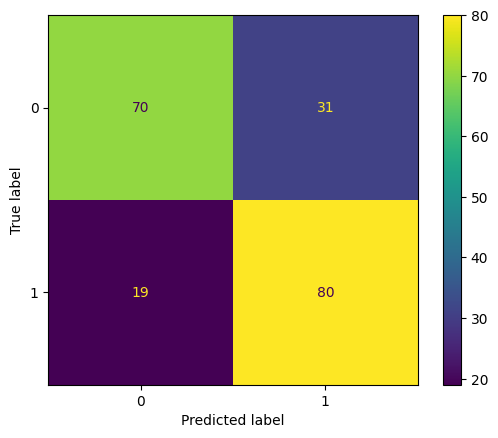

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

- Báo cáo kết quả phân lớp

In [79]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       101
           1       0.72      0.81      0.76        99

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

